# Load data and libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install shap
!pip install pyitlib

In [0]:
import os
os.path.abspath(os.getcwd())
os.chdir('/content/drive/My Drive/Protein project')
os.path.abspath(os.getcwd())

from __future__ import division ###for float operation
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score ##tp / (tp + fn)
from sklearn.metrics import precision_score #tp / (tp + fp)
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.model_selection import KFold, StratifiedKFold
from pyitlib import discrete_random_variable as drv
import time 
import timeit 
import networkx as nx
import matplotlib.pyplot as plt 

def readData(filename):
	fr = open(filename)
	returnData = []
	headerLine=fr.readline()###move cursor 
	for line in fr.readlines():
		lineStrip = line.strip().replace('"','')
		lineList =	lineStrip.split('\t')
		returnData.append(lineList)###['3','2',...]
	return returnData

"""first case P450 = [['1','1',....],[],[].....,[]]  second case P450 = array([['1','1',....],[],[].....,[]]), third case P450 = """
P450 = readData('P450.txt') ### [[],[],[],....[]]
P450 = np.array(P450) ### either [['1','1',....],[],[].....,[]] or array([['1','1',....],[],[].....,[]]) works, but note that keys are '1', '0' 
#P450 = P450.astype(int) ### for shap array [[1,1,....],[],[].....,[]], keys are 1, 0 

M=np.matrix([[245,   9,   0,   3,   0,   2,  65,   8],
[9, 218,  17,  17,  49,  10,  50,  17],
[0,  17, 175,  16,  25,  13,   0,  46],
[3,  17,  16, 194,  19,   0,   0,   3],
[0,  49,  25,  19, 199,  10,   0,   3],
[2,  10,  13,   0,  10, 249,  50,  74],
[65,  50,   0,   0,   0,  50, 262,  11],
[8,  17,  46,   3,   3,  74,  11, 175]])

X = P450[:,0:8]
y = P450[:,-1]

In [0]:
def readData2(filename):
	fr = open(filename)
	returnData = []
	headerLine=fr.readline()###move cursor 
	for line in fr.readlines():
		linestr = line.strip().replace(', ','')
		lineList =	list(linestr)
		returnData.append(lineList)###['3','2',...]
	return returnData

lactamase = readData2('lactamase.txt')
lactamase = np.array(lactamase)
#lactamase = lactamase.astype(int)
M2 = np.matrix([[101, 5, 0, 2, 0, 14, 4, 37],
[5 ,15, 14 ,1 ,7 ,7, 0 ,19],
[0, 14, 266, 15, 14, 2, 26, 4],
[2, 1, 15, 28, 2 ,15, 4, 0],
[0, 7, 14, 2, 32, 9 ,0, 8],
[14, 7, 2 ,15, 9, 29, 7, 9],
[4, 0, 26, 4 ,0 ,7 ,72, 21],
[37, 19, 4, 0, 8, 9, 21, 211]])

X2 = lactamase[:,0:8]
y2 = lactamase[:,-1]

##### nurse

In [0]:
def readData3(filename):
	fr = open(filename)
	returnData = []
	for line in fr.readlines():
		lineList = line.strip().split(',')
		returnData.append(lineList)###['3','2',...]
	return returnData

nurse = readData3("data folder/nursery.data")
nurse.pop()
nurse = np.array(nurse)

X3 = nurse[:,0:8]
y3 = nurse[:,-1] 

In [0]:
print(X3.shape)
nurse.shape

(12960, 8)


(12960, 9)

##### connect-4

In [0]:
def readData4(filename):
	fr = open(filename)
	returnData = []
	for line in fr.readlines():
		lineList = line.strip().split(',')
		returnData.append(lineList)###['3','2',...]
	return returnData

connect_4 = readData4("data folder/connect-4.data")
connect_4 = np.array(connect_4)

X4 = connect_4[:,0:42]
y4 = connect_4[:,-1] 

In [0]:
print(connect_4.shape)
X4.shape

(67557, 43)


(67557, 42)

##### krkopt

In [0]:
krkopt = readData4("data folder/krkopt.data")
krkopt = np.array(krkopt)
X5 = krkopt[:,0:6]
y5 = krkopt[:,-1] 

In [149]:
print(krkopt.shape)
X5.shape

(28056, 7)


(28056, 6)

##### car

In [0]:
car = readData4("data folder/car.data")
car = np.array(car)
X6 = car[:,0:6]
y6 = car[:,-1] 

In [175]:
print(car.shape)
X6.shape

(1728, 7)


(1728, 6)

##### cmc

In [0]:
cmc = readData4("data folder/cmc.data")
cmc = np.array(cmc)
X7 = cmc[:,0:9]
y7 = cmc[:,-1] 

In [185]:
print(X7.shape)
cmc.shape


(1473, 9)


(1473, 10)

##### lym

In [0]:
lym = readData4("data folder/lymphography.data")
lym = np.array(lym)
X8 = lym[:,0:18]
y8 = lym[:,-1] 

In [193]:
print(lym.shape)
X8.shape

(148, 19)


(148, 18)

##### poker

In [0]:
poker = readData4("data folder/poker-hand-testing.data")
poker = np.array(poker)
X9 = poker[:,0:10]
y9 = poker[:,-1]

In [6]:
print(X9.shape)
poker.shape

(1000000, 10)


(1000000, 11)

##### lymph

In [0]:
def readarff(filename):
  arrfFile = open(filename)
  lines = [line.rstrip('\n') for line in arrfFile]
  data = [[]]
  index = 0
  for line in lines :
      if(line.startswith('@attribute')) :
          index+=1
      elif(not line.startswith('@data') and not line.startswith('@relation') and not line.startswith('%')) :
          data.append(line.split(','))
  del data[0]
  return data


lymph_train = readarff("github_bn_code/lymph_train.arff.txt"); lymph_train = np.array(lymph_train)  
lymph_test = readarff("github_bn_code/lymph_test.arff.txt") ;lymph_test = np.array(lymph_test)

lymph = np.concatenate((lymph_train,lymph_test))

X10 = lymph[:,0:18]
y10 = lymph[:,-1]

In [24]:
lymph.shape
X10.shape

(142, 18)

##### vote 

In [0]:
vote_train = readarff("github_bn_code/vote_train.arff.txt") ;vote_train = np.array(vote_train)
vote_test = readarff("github_bn_code/vote_test.arff.txt")  ; vote_test = np.array(vote_test)

vote = np.concatenate((vote_train,vote_test))

In [28]:
vote.shape
X11.shape

(435, 16)

In [0]:
X11 = vote[:,0:16]
y11 = vote[:,-1]

# Bayesian network

In [0]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted ### Checks if the estimator is fitted by verifying the presence of fitted attributes (ending with a trailing underscore)
#from sklearn.utils.multiclass import unique_labels, not necessary, can be replaced by array(list(set()))

In [0]:
"""
Bayesian network implementation
API inspired by SciKit-learn.
"""

class Bayes_net(BaseEstimator, ClassifierMixin): 
    
    def fit(self,X,y,M = None):
      raise NotImplementedError

    def predict_proba(self, X): ### key prediction methods, all other prediction methods will use it first.
      raise NotImplementedError

    def predict_binary(self,X):
      """
        Perform classification on an array of test vectors X, predict P(C1|X), works only for binary classifcation
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
        Returns
        -------
        C : ndarray of shape (n_samples,)
            Predicted P(C1|X)
      """
      Prob_C = self.predict_proba(X) ### Prob_C is n*|C| np.array
      return(Prob_C[:,0]) 

    def predict(self, X):
      """
        Perform classification on an array of test vectors X.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
        Returns
        -------
        C : ndarray of shape (n_samples,)
            Predicted target values for X
      """
      Prob_C = self.predict_proba(X) ## Prob_C is |C|*n np.array ,C is self.C 
      return( np.array([self.classes_[ele] for ele in np.argmax(Prob_C, axis=1)] ) )

    def Conditional_log_likelihood_general(self,y_true,y_pred_prob,C): 
      """Calculate the conditional log likelihood.
      :param y_true: The true class labels. e.g ['1','1',.....'0','0']
      :param y_pred_prob: np.array shows prob of each class for each instance. ith column is the predicted prob for class C[i]
      :param C: Class labels  e.x array(['1','0']), C has to use same labels as y_true.
      :return: CLL. A scalar.
      """
      C = list(C) ## only list can use .index
      cll = []
      for i in range(len(y_true)):
        cll.append( y_pred_prob[i,C.index(y_true[i])] ) ## \hat p(c_true|c_true)
      
      cll = [np.log2(ele) for ele in cll]
      cll = np.array(cll)
      return(sum(cll))
 
    def plot_tree_structure(self,mapping = None,figsize = (5,5)):
      check_is_fitted(self)
      parent = self.parent_
      egdes = [(k,v) for v,k in parent.items() if k is not None]
      G = nx.MultiDiGraph()
      G.add_edges_from(egdes)
      #mapping=dict(zip(range(8),['b0','b1','b2','b3','b4','b5','b6','b7']))
      plt.figure(figsize=figsize)
      nx.draw_networkx(G,nx.shell_layout(G))



## Naive Bayes

In [0]:
class NB(Bayes_net):
  name = "NB"
  def __init__(self, alpha = 1):
      self.alpha = alpha

  def fit(self,X, y, M = None):  
    """ Implementation of a fitting function.
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,) or (n_samples, n_outputs)
            The target values (class labels in classification, real numbers in
            regression).
        Returns
        -------
        self : object
            Returns self.
      """

      #  countDict_, classes_, p_ , P_class_prior_, Dict_C_, K_ ,training_time_, is_fitted_  are fitted "coef_" 
       # coef_ has to been refreshed each fitting. 

    X, y = check_X_y(X, y)
    t = time.process_time()
    #start timing
    countDict = Counter(y) ## {c1:n1,c2:n2,c3:n3} sorted by counts
    C = list(countDict.keys()) ### [class1 , class2, class3] in appearing order
    n,p = X.shape   ## num of features 8                                                           ### values same order as .keys()
    P_class_prior = [(ele+self.alpha)/ ( n + self.alpha*len(C) )  for ele in countDict.values()]  ### prior for each class [p1,p2,p3]
    P_class_prior = dict(zip(C, P_class_prior))  ## {c1:p1,c2:p2,c3:p3} ## should in correct order, .keys .values.
    Dict_C = {} ###  {c1:[counter1, ....counter8], c2:[counter1, ....counter8],   c3: [counter1, ....counter8]}
    K = {} ## [x1 unique , x2 unique .... x8unique]

    for c in C:
      ListCounter_c = []

      for i in range(p):
        row_inx_c = [row for row in range(n) if y[row] == c]
        x_i_c = X[row_inx_c,i]
        ListCounter_c.append(Counter(x_i_c))
        if c == C[0]:
          x_i = X[:,i]
          K[i] = len(Counter(x_i))

      Dict_C[c] = ListCounter_c
    
    CP_time = np.array(time.process_time() - t) 
    self.is_fitted_ = True    
    self.Dict_C_,self.p_,self.P_class_prior_,self.K_,self.classes_,self.countDict_,self.training_time_ = Dict_C,p,P_class_prior,K,np.array(C),countDict,CP_time
    return self


  def predict_proba(self,X): 
    """
        Return probability estimates for the test vector X.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
        Returns
        -------
        C : array-like of shape (n_samples, n_classes)
            Returns the probability of the samples for each class in
            the model. The columns correspond to the classes in sorted
            order, as they appear in the attribute :term:`classes_`.
    """
    check_is_fitted(self)
    X = check_array(X)
    Prob_C = []
    for ins in X:
      P_class = self.P_class_prior_.copy() ### {c1:p1, c2:p2} #### !!!! dict1 = dict2 , change both simultaneously!!!
      for c in self.classes_:
        ListCounter_c = self.Dict_C_[c]
        for i in range(self.p_):
          P_class[c] = P_class[c] * (ListCounter_c[i][ins[i]]+self.alpha) / (self.countDict_[c] + self.alpha*self.K_[i])
        
      ## normalize P_class
      P_class = {key: P_class[key]/sum(list(P_class.values())) for key in P_class.keys()}
      Prob_C.append(list(P_class.values())) ### check the class order is correct
  
    Prob_C = np.array(Prob_C) ### for shap !!!!
    return Prob_C

    

##### krkopt

In [153]:
nb = NB()
nb.fit(X5,y5)
nb.predict(X5)

array(['fifteen', 'fifteen', 'fifteen', ..., 'fourteen', 'fifteen',
       'fifteen'], dtype='<U8')

In [154]:
accuracy_score(y5,nb.predict(X5))

0.3671585400627317

In [159]:
nb.classes_
print(nb.P_class_prior_)

{'draw': 0.09962955047374795, 'zero': 0.0009973641091401296, 'one': 0.002813991593645366, 'two': 0.008798176248486144, 'three': 0.0029208520339103795, 'four': 0.007088409204245922, 'five': 0.016812709268362185, 'six': 0.021122747025717745, 'seven': 0.024364180380423168, 'eight': 0.05107929044667664, 'nine': 0.06101731139132293, 'ten': 0.0707416114554392, 'eleven': 0.10169551898553822, 'twelve': 0.12816128802450666, 'thirteen': 0.14942651563724443, 'fourteen': 0.16221414832229109, 'fifteen': 0.07718885801809504, 'sixteen': 0.01392747738120681}


##### connect 4

In [0]:
nb = NB()
nb.fit(X4,y4)
nb.predict(X4)

array(['loss', 'win', 'win', ..., 'draw', 'win', 'draw'], dtype='<U4')

In [0]:
accuracy_score(y4,nb.predict(X4))

0.7220421273887236

##### nurse

In [0]:
nb = NB()
nb.fit(X3,y3)
pred_class = nb.predict(X3)
print(pred_class[0:20])
print(y3[0:20])
accuracy_score(y3,pred_class)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  estimator=estimator)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).


['very_recom' 'priority' 'not_recom' 'very_recom' 'priority' 'not_recom'
 'priority' 'priority' 'not_recom' 'priority' 'priority' 'not_recom'
 'priority' 'priority' 'not_recom' 'priority' 'priority' 'not_recom'
 'priority' 'priority']
['recommend' 'priority' 'not_recom' 'recommend' 'priority' 'not_recom'
 'priority' 'priority' 'not_recom' 'very_recom' 'priority' 'not_recom'
 'very_recom' 'priority' 'not_recom' 'priority' 'priority' 'not_recom'
 'very_recom' 'priority']


0.9030092592592592

##### P450

In [0]:
nb = NB()
nb.fit(X,y)
nb.predict_proba(X)
#nb.get_params()
#nb.classes_
print(nb.name)
print(nb.predict_proba(X))
nb.score(X,y)

NB
[[0.21028538 0.78971462]
 [0.83483797 0.16516203]
 [0.72336329 0.27663671]
 ...
 [0.42722113 0.57277887]
 [0.4165342  0.5834658 ]
 [0.62970704 0.37029296]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  estimator=estimator)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in sciki

0.8104712041884817

## TAN

In [0]:
class TAN(Bayes_net):
    name = "TAN"
    def __init__(self, alpha = 1,starting_node = 0):
      self.starting_node = starting_node
      self.alpha = alpha

    def To_CAT(self, X_i): 
      """For using CMI purpose, convert X_i e.g ['a','b','a']/['0','1','0']  to [0,1,0].
      :param X_i: one feature column. 
      :return: list(type int)
      """
      X_i_list = list(set(X_i));X_i_dict = dict(zip(X_i_list, range(len(X_i_list)) ))
      return([X_i_dict[ele] for ele in X_i])

    def get_mutual_inf(self,X,Y):
      """get conditional mutual inf of all pairs of features, part of training
      :return: np.array matrix.
      """
      t = time.process_time()
      n,p = X.shape 
      M = np.zeros((p,p))
      Y = self.To_CAT(Y)
      for i in range(p):
        X_i = X[:,i]
        X_i = self.To_CAT(X_i)
        for j in range(p):
          X_j = X[:,j] 
          X_j = self.To_CAT(X_j)
          M[i,j] = drv.information_mutual_conditional(X_i,X_j,Y)
      
      mutual_inf_time = time.process_time() - t
      return M, mutual_inf_time

    def Findparent(self,X,Y):
      M,mutual_inf_time = self.get_mutual_inf(X,Y)
      t = time.process_time()
      np.fill_diagonal(M,0)  
      p = int(M.shape[0])  
      V = range(p)  #### . set of all nodes
      st = self.starting_node
      Vnew = [st] #### vertex that already found their parent. intitiate it with starting node. TAN randomly choose one
      parent = {st:None} ## use a dict to show nodes' interdepedency
      while set(Vnew) != set(V):   ### when their are still nodes whose parents are unknown.
        index_i = [] ### after for loop, has same length as Vnew, shows the closest node that not in Vnew with Vnew.  
        max_inf = [] ### corresponding distance
        for i in range(len(Vnew)):  ## can be paralelled 
          vnew = Vnew[i]
          ListToSorted = [int(e) for e in M[:,vnew]]###
          index = sorted(range(len(ListToSorted)),key = lambda k: ListToSorted[k],reverse = True)
          index_i.append([ele for ele in index if ele not in Vnew][0]) 
          max_inf.append(M[index_i[-1],vnew])
      
        index1 = sorted(range(len(max_inf)),key = lambda k: max_inf[k],reverse = True)[0] ## relative position, Vnew[v1,v2] index_i[v4,v5] max_inf[s1,s2] index1 is the position in those 3 list
        Vnew.append(index_i[index1]) ### add in that node
        parent[index_i[index1]] = Vnew[index1] ## add direction, it has to be that the new added node is child, otherwise some nodes has 2 parents which is wrong.
      
      prim_time = time.process_time() - t
      return parent,mutual_inf_time,prim_time

    def fit(self,X,y,M = None):  ### this is based on trainning data !!!
      X, y = check_X_y(X, y)

      parent,mutual_inf_time,prim_time = self.Findparent(X,y)
      t = time.process_time()
      countDict = Counter(y)
      C = list(countDict.keys()) ### [class1 , class2, class3] in appearing order
      n,p = X.shape
      P_class = [(ele+self.alpha)/( n + self.alpha*len(C) )  for ele in list(countDict.values())]  ### prior for each class [p1,p2,p3], ### .values same order as .keys()
      P_class = dict(zip(C, P_class))  ## {c1:p1,c2:p2,c3:p3} ## should in correct order, .keys .values.
      Dict_C = {} ###  {c1:[counter1, ....counter8], c2:[counter1, ....counter8],   c3: [counter1, ....counter8]}
      K = {}

      root_i = self.starting_node ## 0 ,1 ,2 shows the position, thus int
      x_i = X[:,root_i]
      K[root_i] = len(Counter(x_i))
      for c in C: ### c origianl class label '1'   not 1
        ListCounter_c = {}
        row_inx_c = [row for row in range(n) if y[row] == c]
        x_i_c = X[row_inx_c,root_i]
        ListCounter_c[root_i] = Counter(x_i_c) ### list_counter_c keys are 0,1,2,3... showing position hence int. Counter(x_i_c) keys are original values of x, not position. hence not necesarily int
        for i in [e for e in range(0,p) if e != root_i]:
          if c == C[0]:
            x_i = X[:,i]
            K[i] =len(Counter(x_i))
          x_parent = X[:,parent[i]]
          x_parent_counter = Counter(x_parent)
          x_parent_counter_length = len(x_parent_counter)
          x_parent_value = list(x_parent_counter.keys())
          dict_i_c = {}
          for j in range(x_parent_counter_length):
            row_inx_c_parent_j = [row for row in range(n) if y[row] == c and x_parent[row] == x_parent_value[j]]
            x_i_c_p_j = X[row_inx_c_parent_j, i]
            dict_i_c[x_parent_value[j]] = Counter(x_i_c_p_j) ### x_parent_value[j] can make sure it is right key.
          ListCounter_c[i] = dict_i_c
        Dict_C[c] = ListCounter_c 

      CP_time = time.process_time() - t
      self.is_fitted_ = True 
      self.Dict_C_,self.p_,self.P_class_prior_,self.K_,self.classes_,self.countDict_, self.parent_ = Dict_C,p,P_class,K,np.array(C),countDict,parent
      self.training_time_ = np.array([mutual_inf_time,prim_time,CP_time])
      return self

    def predict_proba(self,X):	
      check_is_fitted(self)
      X = check_array(X)

      Prob_C = []
      root_i = self.starting_node

      for ins in X:
        P_class = self.P_class_prior_.copy()
        for c in self.classes_:
          ListCounter_c = self.Dict_C_[c]
          P_class[c] = P_class[c] * (ListCounter_c[root_i][ins[root_i]]+self.alpha) / (self.countDict_[c]+self.alpha*self.K_[root_i])
        
          for i in [e for e in range(0,self.p_) if e != root_i]:
            pValue = ins[self.parent_[i]] ### replicate C times
            try:###  ListCounter_c[i][pValue],pavlue does show in training
              Deno = sum(list(ListCounter_c[i][pValue].values() )) ## number of y =1, xparent = pvalue ,   ListCounter_c[i][pValue], pavlue does not show in training , keyerror
              P_class[c] = P_class[c] * (ListCounter_c[i][pValue][ins[i]] + self.alpha) / (Deno + self.alpha*self.K_[i]) ## ListCounter1[i][pValue][ins[i]] = number of y =1 xparent = pvalue, xi = xi
            except: ##ListCounter_c[i][pValue],pavlue does not show in training
              Deno = 0 ## ListCounter_c[i] this is when class == c, ith feature,  >> {parent(i) == value1: Counter,  parent(i) == value2: Counter  },  counter shows the distribution of x_i when class ==c and parent == pvalue
              P_class[c] = P_class[c] * (0 + self.alpha) / (Deno + self.alpha*self.K_[i])
        
        P_class = {key: P_class[key]/sum(list(P_class.values())) for key in P_class.keys()} ### normalize p_class
        Prob_C.append(list(P_class.values())) ### check the class order is correct

      Prob_C = np.array(Prob_C) ### for shap !!!!
      return Prob_C


##### krkopt

In [161]:
tan = TAN()
tan.fit(X5,y5)

TAN(alpha=1, starting_node=0)

In [162]:
accuracy_score(y5,tan.predict(X5))

0.542343883661249

##### connect 4

In [0]:
tan = TAN()
tan.fit(X4,y4)

TAN(alpha=1, starting_node=0)

In [0]:
accuracy_score(y4,tan.predict(X4))

0.7635034119336265

##### nurse

In [0]:
tan = TAN()
tan.fit(X3,y3)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  estimator=estimator)


TAN(alpha=1, starting_node=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).


0.9278549382716049

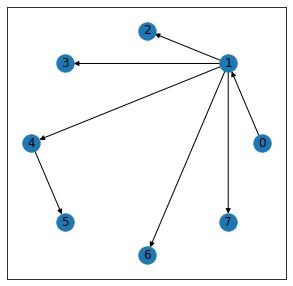

In [0]:
tan.plot_tree_structure()
accuracy_score(y3,tan.predict(X3))

##### P450

In [0]:
tan = TAN()
tan.get_params()

{'alpha': 1, 'starting_node': 0}

In [0]:
tan.fit(X,y)
#tan.fit(X,y)
print(tan.predict_proba(X))
tan.score(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  estimator=estimator)


[[0.86147555 0.13852445]
 [0.90809796 0.09190204]
 [0.92478606 0.07521394]
 ...
 [0.23448663 0.76551337]
 [0.21158355 0.78841645]
 [0.77417023 0.22582977]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).


0.8586387434554974

## STAN

In [0]:
class STAN(Bayes_net):
    name = "STAN"
    def __init__(self,alpha = 1,starting_node = 0):
      self.starting_node = starting_node
      self.alpha = alpha

    def Findparent(self,M):
      M = M.copy()
      np.fill_diagonal(M,0)  
      p = int(M.shape[0])  
      V = range(p)  #### . set of all nodes
      st = self.starting_node
      Vnew = [st] #### vertex that already found their parent. intitiate it with starting node. TAN randomly choose one
      parent = {st:None} ## use a dict to show nodes' interdepedency
      while set(Vnew) != set(V):   ### when their are still nodes whose parents are unknown.
        index_i = [] ### after for loop, has same length as Vnew, shows the closest node that not in Vnew with Vnew.  
        max_inf = [] ### corresponding distance
        for i in range(len(Vnew)):  ## can be paralelled 
          vnew = Vnew[i]
          ListToSorted = [int(e) for e in M[:,vnew]]###
          index = sorted(range(len(ListToSorted)),key = lambda k: ListToSorted[k],reverse = True)
          index_i.append([ele for ele in index if ele not in Vnew][0]) 
          max_inf.append(M[index_i[-1],vnew])
      
        index1 = sorted(range(len(max_inf)),key = lambda k: max_inf[k],reverse = True)[0] ## relative position, Vnew[v1,v2] index_i[v4,v5] max_inf[s1,s2] index1 is the position in those 3 list
        Vnew.append(index_i[index1]) ### add in that node
        parent[index_i[index1]] = Vnew[index1] ## add direction, it has to be that the new added node is child, otherwise some nodes has 2 parents which is wrong.
      
      return parent

    def fit(self,X,y,M):  ### this is based on trainning data !!!
      X, y = check_X_y(X, y)
      parent = self.Findparent(M)
      t = time.process_time()
      countDict = Counter(y)
      C = list(countDict.keys()) ### [class1 , class2, class3] in appearing order
      n,p = X.shape
      P_class = [(ele+self.alpha)/( n + self.alpha*len(C) )  for ele in list(countDict.values())]  ### prior for each class [p1,p2,p3], ### .values same order as .keys()
      P_class = dict(zip(C, P_class))
      Dict_C = {} ###  {c1:[counter1, ....counter8], c2:[counter1, ....counter8],   c3: [counter1, ....counter8]}
      K = {}

      root_i = self.starting_node ## 0 ,1 ,2 shows the position, thus int
      x_i = X[:,root_i]
      K[root_i] = len(Counter(x_i))
      for c in C: ### c origianl class label '1'   not 1
        ListCounter_c = {}
        row_inx_c = [row for row in range(n) if y[row] == c]
        x_i_c = X[row_inx_c,root_i]
        ListCounter_c[root_i] = Counter(x_i_c) ### list_counter_c keys are 0,1,2,3... showing position hence int. Counter(x_i_c) keys are original values of x, not position. hence not necesarily int
        for i in [e for e in range(0,p) if e != root_i]:
          if c == C[0]:
            x_i = X[:,i]
            K[i] =len(Counter(x_i))
          x_parent = X[:,parent[i]] ## will duplicate C times. 
          x_parent_counter = Counter(x_parent)
          x_parent_counter_length = len(x_parent_counter)
          x_parent_value = list(x_parent_counter.keys())
          dict_i_c = {}
          for j in range(x_parent_counter_length):
            row_inx_c_parent_j = [row for row in range(n) if y[row] == c and x_parent[row] == x_parent_value[j]]
            x_i_c_p_j = X[row_inx_c_parent_j, i]
            dict_i_c[x_parent_value[j]] = Counter(x_i_c_p_j) ### x_parent_value[j] can make sure it is right key.
          ListCounter_c[i] = dict_i_c
        Dict_C[c] = ListCounter_c 

      CP_time = np.array(time.process_time() - t)
      self.is_fitted_ = True
      self.Dict_C_,self.p_,self.P_class_prior_,self.K_,self.classes_,self.countDict_,self.parent_ = Dict_C,p,P_class,K,np.array(C),countDict,parent
      self.training_time_ = CP_time
      return self


    def predict_proba(self,X):	
      check_is_fitted(self)
      X = check_array(X)

      Prob_C = []
      root_i = self.starting_node

      for ins in X:
        P_class = self.P_class_prior_.copy()
        for c in self.classes_:
          ListCounter_c = self.Dict_C_[c]
          P_class[c] = P_class[c] * (ListCounter_c[root_i][ins[root_i]]+self.alpha) / (self.countDict_[c]+self.alpha*self.K_[root_i])
        
          for i in [e for e in range(0,self.p_) if e != root_i]:
            pValue = ins[self.parent_[i]] ### replicate C times
            try:###  ListCounter_c[i][pValue],pavlue does show in training
              Deno = sum(list(ListCounter_c[i][pValue].values() )) ## number of y =1, xparent = pvalue ,   ListCounter_c[i][pValue], pavlue does not show in training , keyerror
              P_class[c] = P_class[c] * (ListCounter_c[i][pValue][ins[i]] + self.alpha) / (Deno + self.alpha*self.K_[i]) ## ListCounter1[i][pValue][ins[i]] = number of y =1 xparent = pvalue, xi = xi
            except: ##ListCounter_c[i][pValue],pavlue does not show in training
              Deno = 0 ## ListCounter_c[i] this is when class == c, ith feature,  >> {parent(i) == value1: Counter,  parent(i) == value2: Counter  },  counter shows the distribution of x_i when class ==c and parent == pvalue
              P_class[c] = P_class[c] * (0 + self.alpha) / (Deno + self.alpha*self.K_[i])
        
        P_class = {key: P_class[key]/sum(list(P_class.values())) for key in P_class.keys()} ### normalize p_class
        Prob_C.append(list(P_class.values())) ### check the class order is correct

      Prob_C = np.array(Prob_C) ### for shap !!!!
      return Prob_C



In [0]:
stan = STAN()
stan.get_params()
stan.fit(X,y,M)
print(stan.predict_proba(X))
print(stan.name)
stan.score(X,y)

[[0.79215303 0.20784697]
 [0.91788404 0.08211596]
 [0.92852167 0.07147833]
 ...
 [0.24149027 0.75850973]
 [0.15284187 0.84715813]
 [0.74094713 0.25905287]]
STAN


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  estimator=estimator)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in sciki

0.8617801047120419

In [0]:
from sklearn.utils.estimator_checks import check_estimator

#check_estimator(NB)

## TAN_bagging

In [0]:
class TAN_bagging(Bayes_net):
  name = "TAN_bagging"
  def __init__(self, alpha = 1):
    self.alpha = alpha

  def fit(self,X,y,M = None): 
    """initialize model = [] . and training time."""
    X,y = check_X_y(X,y)
    n,p = X.shape ### number of features
    """fit base models"""
    training_time = 0
    models = []
    for i in range(p):
      model = TAN(self.alpha, starting_node= i)
      model.fit(X,y)
      models.append(model)
      training_time += model.training_time_

    self.models_ , self.p_= models,p
    self.training_time_ = training_time/p ### the fitting can be paralelled, hence define averge training time for this bagging
    self.is_fitted_ = True
    self.classes_ = model.classes_
    return self

  def predict_proba(self,X):	   
    check_is_fitted(self)
    X = check_array(X)

    Prob_C = 0
    for model in self.models_:
      Prob_C += model.predict_proba(X) ### get np array here 

    Prob_C = Prob_C/self.p_
    return(Prob_C)

  

##### kokopt

In [164]:
tan_bag = TAN_bagging()
tan_bag.fit(X5,y5)
tan_bag.predict_proba(X5)

array([[8.30508358e-01, 3.95272500e-04, 1.81427085e-02, ...,
        2.99059426e-03, 1.95090830e-02, 2.41692925e-02],
       [6.01434555e-01, 3.19412208e-04, 2.59786752e-04, ...,
        8.00926315e-02, 2.01756457e-01, 1.90505903e-02],
       [7.77651484e-01, 2.29141573e-03, 2.04441931e-04, ...,
        7.19810533e-02, 6.31429406e-02, 1.18135195e-02],
       ...,
       [2.70052994e-03, 4.99025790e-05, 4.35678214e-05, ...,
        2.79117000e-01, 5.35420971e-01, 5.66674651e-02],
       [4.02977635e-03, 3.59491639e-05, 2.77976220e-05, ...,
        2.19488821e-01, 5.02044245e-01, 1.38918012e-01],
       [2.95254707e-03, 3.95735924e-05, 3.06099378e-05, ...,
        3.02494895e-01, 3.82108144e-01, 1.34614871e-01]])

In [165]:
accuracy_score(y5,tan_bag.predict(X5))

0.5697177074422584

##### connect 4

In [0]:
tan_bag = TAN_bagging()
tan_bag.fit(X4,y4)
tan_bag.predict_proba(X4)

In [0]:
accuracy_score(y4,tan_bag.predict(X4))

#####  nurse

In [0]:
tan_bag = TAN_bagging()
tan_bag.fit(X3,y3)

In [0]:
accuracy_score(y3,tan_bag.predict(X3))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by usin

0.9299382716049382

##### P450

In [0]:
tan_bag = TAN_bagging()
print(tan_bag.name)
tan_bag.fit(X,y)

In [0]:
tan_bag.predict_proba(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by usin

array([[0.82331053, 0.17668947],
       [0.90948728, 0.09051272],
       [0.93262318, 0.06737682],
       ...,
       [0.24045922, 0.75954078],
       [0.21006017, 0.78993983],
       [0.7522166 , 0.2477834 ]])

## STAN bagging

In [0]:
class STAN_bagging(Bayes_net):
  name = "STAN_bagging"
  def __init__(self,alpha = 1):
    self.alpha = alpha

  def fit(self,X,y,M): 
    X,y = check_X_y(X,y)
    n,p = X.shape
    training_time = 0
    models = []
    for i in range(p):
      model = STAN(self.alpha, starting_node= i)
      model.fit(X,y,M)
      models.append(model)
      training_time += model.training_time_

    self.models_, self.p_ = models,p
    self.training_time_ = training_time/p ### the fitting can be paralelled, hence define averge training time for this bagging
    self.is_fitted_ = True
    self.classes_ = model.classes_
    return self

  def predict_proba(self,X):	   
    check_is_fitted(self)
    X = check_array(X)

    Prob_C = 0
    for model in self.models_:
      Prob_C += model.predict_proba(X) ### get np array here 

    Prob_C = Prob_C/self.p_
    return(Prob_C)

  

In [0]:
stan_bag = STAN_bagging()
stan_bag.fit(X,y,M)
stan_bag.fit(X,y,M)

In [0]:
stan_bag.predict_proba(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using 

array([[0.7917778 , 0.2082222 ],
       [0.9187195 , 0.0812805 ],
       [0.92864436, 0.07135564],
       ...,
       [0.24276788, 0.75723212],
       [0.15375769, 0.84624231],
       [0.74263807, 0.25736193]])

## Ensemble TAN (STAN_TAN_bagging)

In [0]:
class STAN_TAN_bagging(Bayes_net):
  name = "STAN_TAN_bagging"
  def __init__(self,alpha = 1):
    self.alpha = alpha

  def fit(self,X,y,M): 
    X,y = check_X_y(X,y)
    n,p = X.shape  
    training_time = 0
    models = []
    ## train p TAN base models
    for i in range(p):
      model = TAN(self.alpha, starting_node= i)
      model.fit(X,y)
      models.append(model)
      training_time += model.training_time_

    #append STAN
    model = STAN(self.alpha, starting_node = 0) ### starting node not importance for TAN, very robust
    model.fit(X,y,M)
    models.append(model)    
    self.models_, self.p_ = models, p
    self.training_time_ = training_time/p ### after paralell, only consider average of p TAN_MT, ignore TAN since it takes less time than TAN_MT
    self.is_fitted_ = True
    self.classes_ = model.classes_
    return self

  def predict_proba(self,X):	   
    check_is_fitted(self)
    X = check_array(X)

    Prob_C = 0
    for model in self.models_:
      Prob_C += model.predict_proba(X) ### get np array here 

    Prob_C = Prob_C/(self.p_+ 1)
    return(Prob_C)

  

##### P450

In [0]:
stan_tan_bag = STAN_TAN_bagging()
stan_tan_bag.fit(X,y,M)

In [0]:
stan_tan_bag.predict_proba(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:105: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by usin

array([[0.81984859, 0.18015141],
       [0.91042025, 0.08957975],
       [0.93216746, 0.06783254],
       ...,
       [0.24057378, 0.75942622],
       [0.20370258, 0.79629742],
       [0.75096444, 0.24903556]])

# Cross validation

In [0]:
import warnings
warnings.filterwarnings("ignore")
def get_cv(cls,X,Y,M,n_splits=10,cv_type = "KFold",verbose = True):  
  """ Cross validation to get CLL and accuracy and training time and precision and recall.
  """

  if cv_type == "StratifiedKFold":
    cv = StratifiedKFold(n_splits= n_splits, shuffle=True, random_state=42)##The folds are made by preserving the percentage of samples for each class.
  else: 
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
  

  model = cls()
  X,Y = check_X_y(X,Y)
  binarizer = MultiLabelBinarizer() ## for using recall and precision score
  binarizer.fit(Y)
  Accuracy = []
  Precision = []
  Recall = []
  CLL = []
  training_time = []
  for folder, (train_index, val_index) in enumerate(cv.split(X, Y)):#### X,Y are array, data is list
    X_train,X_val = X[train_index],X[val_index]
    y_train,y_val = Y[train_index],Y[val_index] 
    model.fit(X_train,y_train,M) ### whether data is list or array does not matter, only thing matters is label has to be same.
    training_time.append(model.training_time_)

    y_pred_prob= model.predict_proba(X_val)  
    y_pred_class = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_class)
    precision = precision_score(binarizer.transform(y_val), 
         binarizer.transform(y_pred_class), 
         average='macro')    
    recall = recall_score(binarizer.transform(y_val), 
         binarizer.transform(y_pred_class), 
         average='macro')
    cll = model.Conditional_log_likelihood_general(y_val,y_pred_prob,model.classes_)

    if verbose:
        print("training accuracy in %s fold is %s" % (folder+1,accuracy_score(y_train,model.predict(X_train))))
        print("accuracy in %s fold is %s" % (folder+1,accuracy))
        print("CLL in %s fold is %s" % (folder+1,cll))
        print("precision in %s fold is %s" % (folder+1,precision))
        print("recall in %s fold is %s" % (folder+1,recall))
        print("training time in %s fold is %s" % (folder+1,training_time[-1]))
        print(10*'__')
    CLL.append(cll)
    Accuracy.append(accuracy)
    Recall.append(recall)
    Precision.append(precision)
  return Accuracy, CLL, training_time,Precision,Recall

##### lactamase

In [43]:
Accuracy, CLL, training_time,Precision,Recall= get_cv(NB,X2,y2,M2)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time)))

training accuracy in 1 fold is 0.8387096774193549
accuracy in 1 fold is 0.875
CLL in 1 fold is -26.97175334366014
precision in 1 fold is 0.9299999999999999
recall in 1 fold is 0.7307692307692308
training time in 1 fold is 0.011069889000282274
____________________
training accuracy in 2 fold is 0.8306451612903226
accuracy in 2 fold is 0.9107142857142857
CLL in 2 fold is -19.79193116126286
precision in 2 fold is 0.9509803921568627
recall in 2 fold is 0.75
training time in 2 fold is 0.00542705499992735
____________________
training accuracy in 3 fold is 0.8551307847082495
accuracy in 3 fold is 0.8181818181818182
CLL in 3 fold is -25.25170879090418
precision in 3 fold is 0.5563725490196079
recall in 3 fold is 0.5305851063829787
training time in 3 fold is 0.005591772999650857
____________________
training accuracy in 4 fold is 0.8430583501006036
accuracy in 4 fold is 0.9090909090909091
CLL in 4 fold is -19.86403033918379
precision in 4 fold is 0.7038690476190476
recall in 4 fold is 0.835784

In [44]:
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN,X2,y2,M2)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.9133064516129032
accuracy in 1 fold is 0.9285714285714286
CLL in 1 fold is -14.530692699471452
precision in 1 fold is 0.9574468085106382
recall in 1 fold is 0.8461538461538461
training time in 1 fold is [3.16579113e-01 2.39900000e-04 1.42512150e-02]
____________________
training accuracy in 2 fold is 0.9112903225806451
accuracy in 2 fold is 0.9642857142857143
CLL in 2 fold is -11.353701614711582
precision in 2 fold is 0.9791666666666667
recall in 2 fold is 0.9
training time in 2 fold is [3.23041254e-01 2.35621000e-04 1.45736890e-02]
____________________
training accuracy in 3 fold is 0.93158953722334
accuracy in 3 fold is 0.8181818181818182
CLL in 3 fold is -32.343225944163294
precision in 3 fold is 0.6555555555555556
recall in 3 fold is 0.6861702127659575
training time in 3 fold is [3.22293211e-01 2.92593000e-04 1.45104790e-02]
____________________
training accuracy in 4 fold is 0.9336016096579477
accuracy in 4 fold is 0.9272727272727272
CLL in 4 fold 

In [49]:
Accuracy, CLL, training_time,Precision,Recall= get_cv(STAN,X2,y2,M2)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time)))

training accuracy in 1 fold is 0.9213709677419355
accuracy in 1 fold is 0.9642857142857143
CLL in 1 fold is -15.904356789215896
precision in 1 fold is 0.9777777777777779
recall in 1 fold is 0.9230769230769231
training time in 1 fold is 0.019482812999740418
____________________
training accuracy in 2 fold is 0.9173387096774194
accuracy in 2 fold is 0.9464285714285714
CLL in 2 fold is -11.995505522810125
precision in 2 fold is 0.9231678486997636
recall in 2 fold is 0.8891304347826088
training time in 2 fold is 0.01574147599967546
____________________
training accuracy in 3 fold is 0.9336016096579477
accuracy in 3 fold is 0.8545454545454545
CLL in 3 fold is -25.68123966870797
precision in 3 fold is 0.7074468085106382
recall in 3 fold is 0.7074468085106382
training time in 3 fold is 0.015232026999910886
____________________
training accuracy in 4 fold is 0.9275653923541247
accuracy in 4 fold is 0.8909090909090909
CLL in 4 fold is -15.979338550197971
precision in 4 fold is 0.7
recall in 4 f

In [50]:
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN_bagging,X2,y2,M2)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.9294354838709677
accuracy in 1 fold is 0.9285714285714286
CLL in 1 fold is -14.7988999751734
precision in 1 fold is 0.9574468085106382
recall in 1 fold is 0.8461538461538461
training time in 1 fold is [4.28068341e-01 3.42030625e-04 1.86611234e-02]
____________________
training accuracy in 2 fold is 0.9314516129032258
accuracy in 2 fold is 0.9642857142857143
CLL in 2 fold is -11.770376562035882
precision in 2 fold is 0.9791666666666667
recall in 2 fold is 0.9
training time in 2 fold is [3.37879108e-01 3.17426375e-04 1.59921056e-02]
____________________
training accuracy in 3 fold is 0.9456740442655935
accuracy in 3 fold is 0.8545454545454545
CLL in 3 fold is -30.611296032426164
precision in 3 fold is 0.7074468085106382
recall in 3 fold is 0.7074468085106382
training time in 3 fold is [3.18152169e-01 2.53537500e-04 1.44320083e-02]
____________________
training accuracy in 4 fold is 0.9356136820925554
accuracy in 4 fold is 0.9272727272727272
CLL in 4 fold 

In [51]:
Accuracy, CLL, training_time,Precision,Recall= get_cv(STAN_bagging,X2,y2,M2)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time)))

training accuracy in 1 fold is 0.9254032258064516
accuracy in 1 fold is 0.9642857142857143
CLL in 1 fold is -15.944546226460112
precision in 1 fold is 0.9777777777777779
recall in 1 fold is 0.9230769230769231
training time in 1 fold is 0.016314369000156148
____________________
training accuracy in 2 fold is 0.9173387096774194
accuracy in 2 fold is 0.9464285714285714
CLL in 2 fold is -11.979787931931426
precision in 2 fold is 0.9231678486997636
recall in 2 fold is 0.8891304347826088
training time in 2 fold is 0.014310107000028438
____________________
training accuracy in 3 fold is 0.9336016096579477
accuracy in 3 fold is 0.8545454545454545
CLL in 3 fold is -25.600493196824697
precision in 3 fold is 0.7074468085106382
recall in 3 fold is 0.7074468085106382
training time in 3 fold is 0.01416758025004583
____________________
training accuracy in 4 fold is 0.93158953722334
accuracy in 4 fold is 0.8909090909090909
CLL in 4 fold is -15.930624895994418
precision in 4 fold is 0.7
recall in 4 fo

In [55]:
Accuracy, CLL, training_time,Precision,Recall= get_cv(STAN_TAN_bagging,X2,y2,M2)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.9254032258064516
accuracy in 1 fold is 0.9464285714285714
CLL in 1 fold is -14.734132799884247
precision in 1 fold is 0.9673913043478262
recall in 1 fold is 0.8846153846153846
training time in 1 fold is [3.34038512e-01 3.08364125e-04 1.47117780e-02]
____________________
training accuracy in 2 fold is 0.9375
accuracy in 2 fold is 0.9821428571428571
CLL in 2 fold is -11.709841765142745
precision in 2 fold is 0.9893617021276595
recall in 2 fold is 0.95
training time in 2 fold is [3.43486313e-01 2.58210125e-04 1.54366305e-02]
____________________
training accuracy in 3 fold is 0.9476861167002012
accuracy in 3 fold is 0.8727272727272727
CLL in 3 fold is -29.684117150877217
precision in 3 fold is 0.7440476190476191
recall in 3 fold is 0.7180851063829787
training time in 3 fold is [3.41408058e-01 2.92344125e-04 1.52383149e-02]
____________________
training accuracy in 4 fold is 0.9416498993963782
accuracy in 4 fold is 0.9272727272727272
CLL in 4 fold is -15.47

##### vote

In [36]:
M11 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(NB,X11,y11,M11,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time)))

training accuracy in 1 fold is 0.896551724137931
accuracy in 1 fold is 0.896551724137931
CLL in 1 fold is -78.51119232544039
precision in 1 fold is 0.9162790697674418
recall in 1 fold is 0.9547169811320756
training time in 1 fold is 0.01525249900032577
____________________
training accuracy in 2 fold is 0.8994252873563219
accuracy in 2 fold is 0.9080459770114943
CLL in 2 fold is -53.13248332236914
precision in 2 fold is 0.9328153903070662
recall in 2 fold is 0.9328153903070662
training time in 2 fold is 0.008753862000048684
____________________
training accuracy in 3 fold is 0.9109195402298851
accuracy in 3 fold is 0.8850574712643678
CLL in 3 fold is -131.5658976479964
precision in 3 fold is 0.9099892588614392
recall in 3 fold is 0.9294857565667776
training time in 3 fold is 0.009096120000322117
____________________
training accuracy in 4 fold is 0.8879310344827587
accuracy in 4 fold is 0.9310344827586207
CLL in 4 fold is -17.89169229348125
precision in 4 fold is 0.9551459293394778
rec

In [37]:
M11 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN,X11,y11,M11,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.9396551724137931
accuracy in 1 fold is 0.9540229885057471
CLL in 1 fold is -15.13170642102751
precision in 1 fold is 0.9614379084967319
recall in 1 fold is 0.9731409544950057
training time in 1 fold is [1.23268102 0.00156974 0.01931708]
____________________
training accuracy in 2 fold is 0.9454022988505747
accuracy in 2 fold is 0.9425287356321839
CLL in 2 fold is -15.640093852230068
precision in 2 fold is 0.9680491551459293
recall in 2 fold is 0.947909729929708
training time in 2 fold is [1.28535088 0.00133381 0.0187371 ]
____________________
training accuracy in 3 fold is 0.9626436781609196
accuracy in 3 fold is 0.9080459770114943
CLL in 3 fold is -42.38070457669825
precision in 3 fold is 0.9259577515216615
recall in 3 fold is 0.9462819089900112
training time in 3 fold is [1.18195051 0.00137287 0.0198672 ]
____________________
training accuracy in 4 fold is 0.9482758620689655
accuracy in 4 fold is 0.9655172413793104
CLL in 4 fold is -13.15660045890311


In [38]:
M11 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN_bagging,X11,y11,M11,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.9454022988505747
accuracy in 1 fold is 0.9655172413793104
CLL in 1 fold is -15.867959569299192
precision in 1 fold is 0.9675675675675676
recall in 1 fold is 0.9849056603773586
training time in 1 fold is [1.28714924 0.00143403 0.02003219]
____________________
training accuracy in 2 fold is 0.9425287356321839
accuracy in 2 fold is 0.9425287356321839
CLL in 2 fold is -12.857277782266756
precision in 2 fold is 0.9680491551459293
recall in 2 fold is 0.947909729929708
training time in 2 fold is [1.28230147 0.00144679 0.01993533]
____________________
training accuracy in 3 fold is 0.9655172413793104
accuracy in 3 fold is 0.9080459770114943
CLL in 3 fold is -40.106488948371755
precision in 3 fold is 0.9259577515216615
recall in 3 fold is 0.9462819089900112
training time in 3 fold is [1.2781077  0.00152002 0.02076309]
____________________
training accuracy in 4 fold is 0.9454022988505747
accuracy in 4 fold is 0.9885057471264368
CLL in 4 fold is -8.79006980719871

##### lymph

In [35]:
M10 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(NB,X10,y10,M10,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time)))

training accuracy in 1 fold is 0.8672566371681416
accuracy in 1 fold is 0.9310344827586207
CLL in 1 fold is -7.17025563479127
precision in 1 fold is 0.9382396449704142
recall in 1 fold is 0.9382396449704142
training time in 1 fold is 0.0063484649999736575
____________________
training accuracy in 2 fold is 0.8938053097345132
accuracy in 2 fold is 0.8620689655172413
CLL in 2 fold is -14.097504113774834
precision in 2 fold is 0.8702865761689291
recall in 2 fold is 0.8702865761689291
training time in 2 fold is 0.003957177999836858
____________________
training accuracy in 3 fold is 0.868421052631579
accuracy in 3 fold is 0.9285714285714286
CLL in 3 fold is -11.269617389548033
precision in 3 fold is 0.9342948717948717
recall in 3 fold is 0.9342948717948717
training time in 3 fold is 0.003448580000167567
____________________
training accuracy in 4 fold is 0.8947368421052632
accuracy in 4 fold is 0.7857142857142857
CLL in 4 fold is -30.33006082015267
precision in 4 fold is 0.8256410256410258

In [34]:
M10 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN,X10,y10,M10,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.9292035398230089
accuracy in 1 fold is 0.9310344827586207
CLL in 1 fold is -8.743540985263598
precision in 1 fold is 0.9179487179487181
recall in 1 fold is 0.9711538461538461
training time in 1 fold is [1.40075957 0.00188043 0.01025116]
____________________
training accuracy in 2 fold is 0.9557522123893806
accuracy in 2 fold is 0.7931034482758621
CLL in 2 fold is -20.86295380801949
precision in 2 fold is 0.8054298642533938
recall in 2 fold is 0.8054298642533938
training time in 2 fold is [1.42008128 0.00199011 0.01012184]
____________________
training accuracy in 3 fold is 0.9385964912280702
accuracy in 3 fold is 0.9285714285714286
CLL in 3 fold is -8.778405754287567
precision in 3 fold is 0.9342948717948717
recall in 3 fold is 0.9342948717948717
training time in 3 fold is [1.50886004 0.0020954  0.01206469]
____________________
training accuracy in 4 fold is 0.956140350877193
accuracy in 4 fold is 0.8214285714285714
CLL in 4 fold is -21.3942227473964
pr

In [33]:
M10 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN_bagging,X10,y10,M10,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.9380530973451328
accuracy in 1 fold is 0.896551724137931
CLL in 1 fold is -9.136652147452248
precision in 1 fold is 0.8967032967032968
recall in 1 fold is 0.9238165680473374
training time in 1 fold is [1.37890189 0.00197977 0.01159111]
____________________
training accuracy in 2 fold is 0.9646017699115044
accuracy in 2 fold is 0.7931034482758621
CLL in 2 fold is -18.21572590868927
precision in 2 fold is 0.8054298642533938
recall in 2 fold is 0.8054298642533938
training time in 2 fold is [1.36407795 0.00194518 0.01129428]
____________________
training accuracy in 3 fold is 0.9385964912280702
accuracy in 3 fold is 0.8928571428571429
CLL in 3 fold is -7.93187655878451
precision in 3 fold is 0.889940828402367
recall in 3 fold is 0.9198717948717948
training time in 3 fold is [1.37232919 0.00195317 0.01187463]
____________________
training accuracy in 4 fold is 0.9649122807017544
accuracy in 4 fold is 0.8571428571428571
CLL in 4 fold is -17.570182843762115
pr

##### poker

In [15]:
M9 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(NB,X9,y9,M9,cv_type = "StratifiedKFold",n_splits=3) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time)))

training accuracy in 1 fold is 0.5012090012090012
accuracy in 1 fold is 0.5012089975820049
CLL in 1 fold is -471856.36736571963
precision in 1 fold is 0.050120899758200485
recall in 1 fold is 0.1
training time in 1 fold is 24.829522631000003
____________________
training accuracy in 2 fold is 0.5012082493958753
accuracy in 2 fold is 0.5012105012105013
CLL in 2 fold is -471797.8009633667
precision in 2 fold is 0.05012105012105013
recall in 2 fold is 0.1
training time in 2 fold is 24.445563980999992
____________________
training accuracy in 3 fold is 0.5012097493951253
accuracy in 3 fold is 0.5012075012075012
CLL in 3 fold is -471978.8635877992
precision in 3 fold is 0.050120750120750124
recall in 3 fold is 0.1
training time in 3 fold is 24.46438533199995
____________________
0.5012090000000025
-471877.67730562855
0.050120900000000246
0.10000000000000002
24.579823981333316


In [0]:
M9 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN,X9,y9,M9,cv_type = "StratifiedKFold",n_splits=3) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

In [0]:
M9 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN_bagging,X9,y9,M9,cv_type = "StratifiedKFold",n_splits=3) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

##### lym

In [198]:
M8 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(NB,X8,y8,M8,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time)))

training accuracy in 1 fold is 0.6779661016949152
accuracy in 1 fold is 0.3
CLL in 1 fold is -85.31205571434344
precision in 1 fold is 0.19270833333333334
recall in 1 fold is 0.2599431818181818
training time in 1 fold is 0.014764157000172418
____________________
training accuracy in 2 fold is 0.559322033898305
accuracy in 2 fold is 0.4666666666666667
CLL in 2 fold is -83.14056943155319
precision in 2 fold is 0.25476190476190474
recall in 2 fold is 0.30445075757575757
training time in 2 fold is 0.007651806001376826
____________________
training accuracy in 3 fold is 0.6271186440677966
accuracy in 3 fold is 0.36666666666666664
CLL in 3 fold is -82.9054514615094
precision in 3 fold is 0.27642045454545455
recall in 3 fold is 0.26406926406926406
training time in 3 fold is 0.00760091200027091
____________________
training accuracy in 4 fold is 0.6134453781512605
accuracy in 4 fold is 0.4482758620689655
CLL in 4 fold is -88.77068880217175
precision in 4 fold is 0.1625
recall in 4 fold is 0.16

In [195]:
M8 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN,X8,y8,M8,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.788135593220339
accuracy in 1 fold is 0.4
CLL in 1 fold is -78.41655046091091
precision in 1 fold is 0.19583333333333333
recall in 1 fold is 0.2471590909090909
training time in 1 fold is [1.43462086 0.0019391  0.0331924 ]
____________________
training accuracy in 2 fold is 0.8220338983050848
accuracy in 2 fold is 0.36666666666666664
CLL in 2 fold is -91.56850257303032
precision in 2 fold is 0.18125
recall in 2 fold is 0.18892045454545453
training time in 2 fold is [1.42292617 0.00203704 0.02873135]
____________________
training accuracy in 3 fold is 0.7457627118644068
accuracy in 3 fold is 0.4666666666666667
CLL in 3 fold is -84.23872566790193
precision in 3 fold is 0.21056547619047616
recall in 3 fold is 0.28084415584415584
training time in 3 fold is [1.40316181 0.00193815 0.03324342]
____________________
training accuracy in 4 fold is 0.7394957983193278
accuracy in 4 fold is 0.3448275862068966
CLL in 4 fold is -83.4068520629268
precision in 4 fold is 

In [196]:
M8 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN_bagging,X8,y8,M8,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.7796610169491526
accuracy in 1 fold is 0.4
CLL in 1 fold is -77.31173377010329
precision in 1 fold is 0.1875
recall in 1 fold is 0.2471590909090909
training time in 1 fold is [1.39420701 0.00191873 0.03322961]
____________________
training accuracy in 2 fold is 0.8050847457627118
accuracy in 2 fold is 0.4
CLL in 2 fold is -87.76100371184614
precision in 2 fold is 0.1875
recall in 2 fold is 0.2002840909090909
training time in 2 fold is [1.39029456 0.00192554 0.03661906]
____________________
training accuracy in 3 fold is 0.7372881355932204
accuracy in 3 fold is 0.4666666666666667
CLL in 3 fold is -80.0337059600125
precision in 3 fold is 0.21056547619047616
recall in 3 fold is 0.28084415584415584
training time in 3 fold is [1.38147039 0.00194172 0.03345346]
____________________
training accuracy in 4 fold is 0.7478991596638656
accuracy in 4 fold is 0.3448275862068966
CLL in 4 fold is -79.86088377881386
precision in 4 fold is 0.12215909090909091
recall in 

##### cmc

In [186]:
M7 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(NB,X7,y7,M7,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time)))

training accuracy in 1 fold is 0.5449915110356537
accuracy in 1 fold is 0.511864406779661
CLL in 1 fold is -456.14468649354205
precision in 1 fold is 0.506679436911995
recall in 1 fold is 0.5090188645939304
training time in 1 fold is 0.021105517000250984
____________________
training accuracy in 2 fold is 0.5398981324278438
accuracy in 2 fold is 0.5322033898305085
CLL in 2 fold is -394.9089246998972
precision in 2 fold is 0.5211297577017943
recall in 2 fold is 0.5301735951428664
training time in 2 fold is 0.01768144299967389
____________________
training accuracy in 3 fold is 0.5551782682512734
accuracy in 3 fold is 0.48135593220338985
CLL in 3 fold is -441.1740493766236
precision in 3 fold is 0.4683268272984251
recall in 3 fold is 0.4744369258932366
training time in 3 fold is 0.016392183999414556
____________________
training accuracy in 4 fold is 0.5411365564037319
accuracy in 4 fold is 0.5068027210884354
CLL in 4 fold is -445.72195587143267
precision in 4 fold is 0.4969751756791437


In [187]:
M7 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN,X7,y7,M7,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.7444821731748726
accuracy in 1 fold is 0.5016949152542373
CLL in 1 fold is -466.9952484595603
precision in 1 fold is 0.478319783197832
recall in 1 fold is 0.4785688736522802
training time in 1 fold is [6.03395851e-01 3.05939000e-04 3.52150979e-01]
____________________
training accuracy in 2 fold is 0.7580645161290323
accuracy in 2 fold is 0.47796610169491527
CLL in 2 fold is -489.2493006738692
precision in 2 fold is 0.45202809422992907
recall in 2 fold is 0.4482419833605084
training time in 2 fold is [5.88235084e-01 3.07032000e-04 3.46772763e-01]
____________________
training accuracy in 3 fold is 0.7368421052631579
accuracy in 3 fold is 0.4711864406779661
CLL in 3 fold is -493.46034500798044
precision in 3 fold is 0.4448305805372996
recall in 3 fold is 0.439328560687784
training time in 3 fold is [5.18672849e-01 3.16108000e-04 3.05788957e-01]
____________________
training accuracy in 4 fold is 0.7480916030534351
accuracy in 4 fold is 0.4727891156462585

In [188]:
M7 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN_bagging,X7,y7,M7,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.7393887945670629
accuracy in 1 fold is 0.5084745762711864
CLL in 1 fold is -458.6529065130023
precision in 1 fold is 0.48476236022864433
recall in 1 fold is 0.48510482136469846
training time in 1 fold is [5.46655337e-01 3.21264333e-04 3.18336772e-01]
____________________
training accuracy in 2 fold is 0.7640067911714771
accuracy in 2 fold is 0.4711864406779661
CLL in 2 fold is -480.3406295506992
precision in 2 fold is 0.4467524374144138
recall in 2 fold is 0.44403565738069695
training time in 2 fold is [5.67011550e-01 3.20403112e-04 3.21784188e-01]
____________________
training accuracy in 3 fold is 0.7427843803056027
accuracy in 3 fold is 0.4711864406779661
CLL in 3 fold is -483.7013413424599
precision in 3 fold is 0.4472587528420031
recall in 3 fold is 0.44232430640197623
training time in 3 fold is [5.57919695e-01 3.40252111e-04 2.83862438e-01]
____________________
training accuracy in 4 fold is 0.7514843087362172
accuracy in 4 fold is 0.4761904761904

##### car

In [176]:
M6 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(NB,X6,y6,M6,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time)))

training accuracy in 1 fold is 0.8733719247467439
accuracy in 1 fold is 0.8265895953757225
CLL in 1 fold is -167.91043060795897
precision in 1 fold is 0.8472284226190476
recall in 1 fold is 0.6113205846748166
training time in 1 fold is 0.01695114300127898
____________________
training accuracy in 2 fold is 0.8661360347322721
accuracy in 2 fold is 0.8670520231213873
CLL in 2 fold is -168.61136607292207
precision in 2 fold is 0.9087425595238096
recall in 2 fold is 0.666094876909924
training time in 2 fold is 0.01651895900067757
____________________
training accuracy in 3 fold is 0.8712011577424024
accuracy in 3 fold is 0.8583815028901735
CLL in 3 fold is -165.0699151041235
precision in 3 fold is 0.9083820064788456
recall in 3 fold is 0.680550988544719
training time in 3 fold is 0.01633374300035939
____________________
training accuracy in 4 fold is 0.8676789587852495
accuracy in 4 fold is 0.8666666666666667
CLL in 4 fold is -164.55751838686365
precision in 4 fold is 0.8824424087816944
re

In [177]:
M6 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN,X6,y6,M6,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.9334298118668596
accuracy in 1 fold is 0.9017341040462428
CLL in 1 fold is -135.1984492943852
precision in 1 fold is 0.8863506932981182
recall in 1 fold is 0.8102148200110583
training time in 1 fold is [2.79250068e-01 1.37843999e-04 5.47045850e-02]
____________________
training accuracy in 2 fold is 0.9247467438494935
accuracy in 2 fold is 0.9161849710982659
CLL in 2 fold is -119.25882478827715
precision in 2 fold is 0.9116662658329325
recall in 2 fold is 0.8143826741005424
training time in 2 fold is [2.69215808e-01 1.47072000e-04 5.81006060e-02]
____________________
training accuracy in 3 fold is 0.926917510853835
accuracy in 3 fold is 0.8988439306358381
CLL in 3 fold is -130.98780182086483
precision in 3 fold is 0.9350610500610501
recall in 3 fold is 0.8124931494837451
training time in 3 fold is [2.76477844e-01 1.43302001e-04 5.73525590e-02]
____________________
training accuracy in 4 fold is 0.9262472885032538
accuracy in 4 fold is 0.9014492753623189

In [178]:
M6 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN_bagging,X6,y6,M6,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.9363241678726484
accuracy in 1 fold is 0.9075144508670521
CLL in 1 fold is -131.48081518371262
precision in 1 fold is 0.9167593471442721
recall in 1 fold is 0.8395599959079583
training time in 1 fold is [2.66710009e-01 1.40819167e-04 5.59509240e-02]
____________________
training accuracy in 2 fold is 0.9276410998552822
accuracy in 2 fold is 0.9277456647398844
CLL in 2 fold is -115.6571977796781
precision in 2 fold is 0.927286943219074
recall in 2 fold is 0.8752801099979783
training time in 2 fold is [2.54346710e-01 1.36152833e-04 5.31529363e-02]
____________________
training accuracy in 3 fold is 0.9283646888567294
accuracy in 3 fold is 0.9104046242774566
CLL in 3 fold is -124.76073245961871
precision in 3 fold is 0.9473404887807062
recall in 3 fold is 0.8637752007657964
training time in 3 fold is [2.60276354e-01 1.34903833e-04 5.40941597e-02]
____________________
training accuracy in 4 fold is 0.928416485900217
accuracy in 4 fold is 0.9130434782608695


##### kokopt

In [167]:
M5 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(NB,X5,y5,M5,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time)))

training accuracy in 1 fold is 0.36998752450543576
accuracy in 1 fold is 0.3576265146115467
CLL in 1 fold is -14182.653085513191
precision in 1 fold is 0.46578344337065264
recall in 1 fold is 0.4929325004890579
training time in 1 fold is 0.8188928180006769
____________________
training accuracy in 2 fold is 0.3684562263310314
accuracy in 2 fold is 0.36000712885403674
CLL in 2 fold is -14175.287768938735
precision in 2 fold is 0.5176970979319404
recall in 2 fold is 0.5125627456029113
training time in 2 fold is 0.8244813389992487
____________________
training accuracy in 3 fold is 0.36899086656270885
accuracy in 3 fold is 0.3666013188379968
CLL in 3 fold is -14067.578531752164
precision in 3 fold is 0.47588815619564784
recall in 3 fold is 0.5053690803361722
training time in 3 fold is 0.8681830599998648
____________________
training accuracy in 4 fold is 0.36863443974159055
accuracy in 4 fold is 0.3503831759044734
CLL in 4 fold is -14228.671817982326
precision in 4 fold is 0.4531143793649

In [168]:
M5 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN,X5,y5,M5,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.5447781144181073
accuracy in 1 fold is 0.5144333570919458
CLL in 1 fold is -10663.981271278726
precision in 1 fold is 0.6367745385549184
recall in 1 fold is 0.6606857259390407
training time in 1 fold is [2.06538253e+00 1.58089000e-04 4.31906435e+00]
____________________
training accuracy in 2 fold is 0.5456449097794609
accuracy in 2 fold is 0.511138834432365
CLL in 2 fold is -10603.683470835329
precision in 2 fold is 0.6392380079448432
recall in 2 fold is 0.6636500543586096
training time in 2 fold is [2.12067741e+00 2.76777000e-04 4.32015165e+00]
____________________
training accuracy in 3 fold is 0.5435063488527512
accuracy in 3 fold is 0.5171983603635716
CLL in 3 fold is -10614.55245957148
precision in 3 fold is 0.640795182209226
recall in 3 fold is 0.6637452240606159
training time in 3 fold is [2.10451835e+00 1.44783000e-04 4.35821320e+00]
____________________
training accuracy in 4 fold is 0.5431944753842727
accuracy in 4 fold is 0.5097130636250222


In [169]:
M5 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN_bagging,X5,y5,M5,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.5718232044198895
accuracy in 1 fold is 0.5347469707769066
CLL in 1 fold is -10412.497415582358
precision in 1 fold is 0.6489375688670249
recall in 1 fold is 0.6717182590987922
training time in 1 fold is [2.10205243e+00 1.60026333e-04 4.86235046e+00]
____________________
training accuracy in 2 fold is 0.5737135219425262
accuracy in 2 fold is 0.5394760292283015
CLL in 2 fold is -10335.984702428346
precision in 2 fold is 0.6582134859376062
recall in 2 fold is 0.6842345770984173
training time in 2 fold is [2.08544659e+00 1.46414834e-04 4.83785520e+00]
____________________
training accuracy in 3 fold is 0.5743372688794832
accuracy in 3 fold is 0.5426840135448227
CLL in 3 fold is -10374.811617938954
precision in 3 fold is 0.6591420528614793
recall in 3 fold is 0.6802622351365538
training time in 3 fold is [2.09958410e+00 1.61122000e-04 4.85005975e+00]
____________________
training accuracy in 4 fold is 0.5724214747159724
accuracy in 4 fold is 0.53092140438424

##### connect 4

In [0]:
M4 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(NB,X4,y4,M4,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time)))

In [0]:
M4 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN,X4,y4,M4,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

In [0]:
M4 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN_bagging,X4,y4,M4,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

##### Nurse 

In [0]:
M3 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(NB,X3,y3,M3,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time)))

training accuracy in 1 fold is 0.9035493827160493
accuracy in 1 fold is 0.8973765432098766
CLL in 1 fold is -982.7925106842583
precision in 1 fold is 0.8703003569049182
recall in 1 fold is 0.8130803778022427
training time in 1 fold is 0.20355978000000619
____________________
training accuracy in 2 fold is 0.9040316358024691
accuracy in 2 fold is 0.90625
CLL in 2 fold is -979.3229745620492
precision in 2 fold is 0.8821994737573744
recall in 2 fold is 0.8198643523808143
training time in 2 fold is 0.2007397600000047
____________________
training accuracy in 3 fold is 0.9031635802469136
accuracy in 3 fold is 0.9016203703703703
CLL in 3 fold is -993.4308995666568
precision in 3 fold is 0.8892063945419286
recall in 3 fold is 0.816677538277888
training time in 3 fold is 0.19626298899999028
____________________
training accuracy in 4 fold is 0.9032600308641975
accuracy in 4 fold is 0.9004629629629629
CLL in 4 fold is -989.7047136143319
precision in 4 fold is 0.8883909482561796
recall in 4 fold

In [0]:
M3 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN,X3,y3,M3,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.9278549382716049
accuracy in 1 fold is 0.9216820987654321
CLL in 1 fold is -645.1500156224513
precision in 1 fold is 0.8911673864807932
recall in 1 fold is 0.8352184876614418
training time in 1 fold is [1.96038606e+00 2.46048000e-04 8.27372797e-01]
____________________
training accuracy in 2 fold is 0.9284336419753086
accuracy in 2 fold is 0.9332561728395061
CLL in 2 fold is -619.2259165940302
precision in 2 fold is 0.8951371847236956
recall in 2 fold is 0.8364602859521411
training time in 2 fold is [1.96201372e+00 2.47462000e-04 8.56192081e-01]
____________________
training accuracy in 3 fold is 0.9297839506172839
accuracy in 3 fold is 0.9216820987654321
CLL in 3 fold is -661.1614516726289
precision in 3 fold is 0.895714865735749
recall in 3 fold is 0.8385550172085257
training time in 3 fold is [1.84154626e+00 2.68981000e-04 8.43009164e-01]
____________________
training accuracy in 4 fold is 0.9351851851851852
accuracy in 4 fold is 0.9301697530864198
C

In [0]:
M3 = None
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN_bagging,X3,y3,M3,cv_type = "StratifiedKFold",n_splits=5) ### training data does not cover all classes!!
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))


training accuracy in 1 fold is 0.9299768518518519
accuracy in 1 fold is 0.9205246913580247
CLL in 1 fold is -644.3851957347757
precision in 1 fold is 0.8898461337093486
recall in 1 fold is 0.8340669122332901
training time in 1 fold is [1.93628369e+00 3.10324750e-04 8.21353093e-01]
____________________
training accuracy in 2 fold is 0.9307484567901234
accuracy in 2 fold is 0.9367283950617284
CLL in 2 fold is -617.4685804289292
precision in 2 fold is 0.8960565257836005
recall in 2 fold is 0.8385484019891187
training time in 2 fold is [1.92316494e+00 2.81698250e-04 8.11090246e-01]
____________________
training accuracy in 3 fold is 0.9312307098765432
accuracy in 3 fold is 0.9247685185185185
CLL in 3 fold is -656.229469957575
precision in 3 fold is 0.8967629492359314
recall in 3 fold is 0.8380727194918726
training time in 3 fold is [1.92691600e+00 2.93780625e-04 8.11628392e-01]
____________________
training accuracy in 4 fold is 0.9347029320987654
accuracy in 4 fold is 0.9328703703703703
C

##### P450

In [39]:
Accuracy, CLL, training_time,Precision,Recall= get_cv(NB,X,y,M)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time)))

training accuracy in 1 fold is 0.810244470314319
accuracy in 1 fold is 0.8020833333333334
CLL in 1 fold is -57.51714626410332
precision in 1 fold is 0.7954139368671829
recall in 1 fold is 0.7421875
training time in 1 fold is 0.013353827999708301
____________________
training accuracy in 2 fold is 0.8207217694994179
accuracy in 2 fold is 0.75
CLL in 2 fold is -68.1715682108779
precision in 2 fold is 0.75
recall in 2 fold is 0.65625
training time in 2 fold is 0.009983912000279815
____________________
training accuracy in 3 fold is 0.8137369033760187
accuracy in 3 fold is 0.78125
CLL in 3 fold is -64.34047653359448
precision in 3 fold is 0.7519356759976177
recall in 3 fold is 0.7136363636363636
training time in 3 fold is 0.009397081999850343
____________________
training accuracy in 4 fold is 0.8020954598370198
accuracy in 4 fold is 0.8958333333333334
CLL in 4 fold is -53.42218540005552
precision in 4 fold is 0.8862583633556356
recall in 4 fold is 0.8724565756823821
training time in 4 fol

In [40]:
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN,X,y,M)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.8556461001164144
accuracy in 1 fold is 0.8854166666666666
CLL in 1 fold is -46.55818986810372
precision in 1 fold is 0.8672131147540985
recall in 1 fold is 0.8828125
training time in 1 fold is [4.24497103e-01 2.99017000e-04 2.75249080e-02]
____________________
training accuracy in 2 fold is 0.860302677532014
accuracy in 2 fold is 0.8645833333333334
CLL in 2 fold is -54.54879476906739
precision in 2 fold is 0.8493796526054591
recall in 2 fold is 0.84375
training time in 2 fold is [4.13134870e-01 3.62078999e-04 2.59391470e-02]
____________________
training accuracy in 3 fold is 0.8637951105937136
accuracy in 3 fold is 0.7916666666666666
CLL in 3 fold is -56.79030920695614
precision in 3 fold is 0.7575757575757576
recall in 3 fold is 0.7575757575757576
training time in 3 fold is [4.06957331e-01 2.45319000e-04 2.73663710e-02]
____________________
training accuracy in 4 fold is 0.8521536670547147
accuracy in 4 fold is 0.8958333333333334
CLL in 4 fold is -39.

In [0]:
Accuracy, CLL, training_time,Precision,Recall= get_cv(STAN,X,y,M)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time)))

training accuracy in 1 fold is 0.8649592549476135
accuracy in 1 fold is 0.8229166666666666
CLL in 1 fold is -55.85948458302803
precision in 1 fold is 0.8046834791559444
recall in 1 fold is 0.7890625
training time in 1 fold is 0.033738367000012204
____________________
training accuracy in 2 fold is 0.8637951105937136
accuracy in 2 fold is 0.8541666666666666
CLL in 2 fold is -54.687000297140195
precision in 2 fold is 0.8611111111111112
recall in 2 fold is 0.8046875
training time in 2 fold is 0.025807196000016575
____________________
training accuracy in 3 fold is 0.8684516880093132
accuracy in 3 fold is 0.8645833333333334
CLL in 3 fold is -50.85895571798849
precision in 3 fold is 0.8409429280397023
recall in 3 fold is 0.8469696969696969
training time in 3 fold is 0.02457379800000581
____________________
training accuracy in 4 fold is 0.8544819557625145
accuracy in 4 fold is 0.90625
CLL in 4 fold is -38.04638101612256
precision in 4 fold is 0.9236111111111112
recall in 4 fold is 0.8632754

In [0]:
Accuracy, CLL, training_time,Precision,Recall= get_cv(TAN_bagging,X,y,M)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.8684516880093132
accuracy in 1 fold is 0.875
CLL in 1 fold is -47.92612560149002
precision in 1 fold is 0.8567362428842504
recall in 1 fold is 0.8671875
training time in 1 fold is [3.84331670e-01 2.47450500e-04 2.57905741e-02]
____________________
training accuracy in 2 fold is 0.8684516880093132
accuracy in 2 fold is 0.875
CLL in 2 fold is -54.189240263708854
precision in 2 fold is 0.8636363636363636
recall in 2 fold is 0.8515625
training time in 2 fold is [3.87443259e-01 2.48843375e-04 2.57500986e-02]
____________________
training accuracy in 3 fold is 0.8672875436554133
accuracy in 3 fold is 0.8125
CLL in 3 fold is -56.124353961205536
precision in 3 fold is 0.7836134453781513
recall in 3 fold is 0.7727272727272727
training time in 3 fold is [3.94899668e-01 2.58946375e-04 2.62919835e-02]
____________________
training accuracy in 4 fold is 0.8649592549476135
accuracy in 4 fold is 0.9166666666666666
CLL in 4 fold is -39.03597805384587
precision in 4 fol

In [0]:
Accuracy, CLL, training_time,Precision,Recall= get_cv(STAN_bagging,X,y,M)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time)))

training accuracy in 1 fold is 0.8649592549476135
accuracy in 1 fold is 0.8229166666666666
CLL in 1 fold is -55.87105795769669
precision in 1 fold is 0.8046834791559444
recall in 1 fold is 0.7890625
training time in 1 fold is 0.029651703375002114
____________________
training accuracy in 2 fold is 0.8626309662398137
accuracy in 2 fold is 0.8541666666666666
CLL in 2 fold is -54.70279598742378
precision in 2 fold is 0.8611111111111112
recall in 2 fold is 0.8046875
training time in 2 fold is 0.025584272875008196
____________________
training accuracy in 3 fold is 0.8684516880093132
accuracy in 3 fold is 0.8645833333333334
CLL in 3 fold is -50.89311606229163
precision in 3 fold is 0.8409429280397023
recall in 3 fold is 0.8469696969696969
training time in 3 fold is 0.025351658624991558
____________________
training accuracy in 4 fold is 0.8556461001164144
accuracy in 4 fold is 0.90625
CLL in 4 fold is -38.02803981610572
precision in 4 fold is 0.9236111111111112
recall in 4 fold is 0.8632754

In [0]:
Accuracy, CLL, training_time,Precision,Recall= get_cv(STAN_TAN_bagging,X,y,M)
print(np.mean(Accuracy))
print(np.mean(CLL))
print(np.mean(Precision))
print(np.mean(Recall))
print(np.mean(np.array(training_time),axis=0))

training accuracy in 1 fold is 0.8672875436554133
accuracy in 1 fold is 0.875
CLL in 1 fold is -48.53587560336295
precision in 1 fold is 0.8567362428842504
recall in 1 fold is 0.8671875
training time in 1 fold is [3.71970587e-01 2.60380750e-04 2.50799911e-02]
____________________
training accuracy in 2 fold is 0.8731082654249127
accuracy in 2 fold is 0.8645833333333334
CLL in 2 fold is -53.75258294734038
precision in 2 fold is 0.8540916109109624
recall in 2 fold is 0.8359375
training time in 2 fold is [3.75193485e-01 2.54380500e-04 2.53727291e-02]
____________________
training accuracy in 3 fold is 0.869615832363213
accuracy in 3 fold is 0.8229166666666666
CLL in 3 fold is -54.855522280517974
precision in 3 fold is 0.7979066022544283
recall in 3 fold is 0.7803030303030303
training time in 3 fold is [3.82820325e-01 2.51139750e-04 2.57690171e-02]
____________________
training accuracy in 4 fold is 0.8672875436554133
accuracy in 4 fold is 0.9166666666666666
CLL in 4 fold is -38.6144709036

# plot the Bayesian network

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  estimator=estimator)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  estimator=estimator)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a

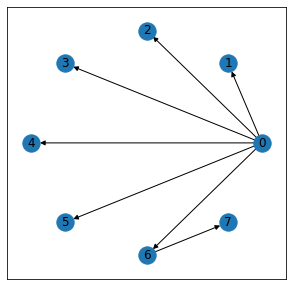

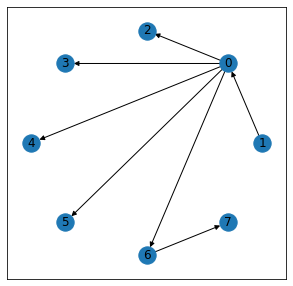

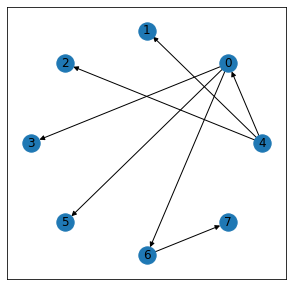

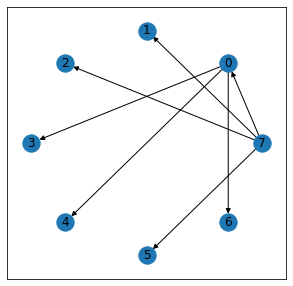

In [0]:
tan0 = TAN(starting_node=0)
tan0.fit(X,y)
tan0.plot_tree_structure()

tan1 = TAN(starting_node=1)
tan1.fit(X,y)
tan1.plot_tree_structure()

tan4 = TAN(starting_node=4)
tan4.fit(X,y)
tan4.plot_tree_structure()

tan7 = TAN(starting_node=7)
tan7.fit(X,y)
tan7.plot_tree_structure()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  estimator=estimator)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  estimator=estimator)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a

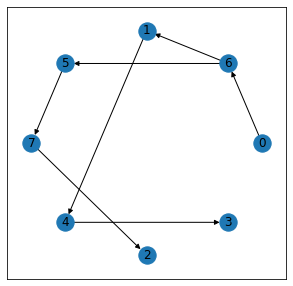

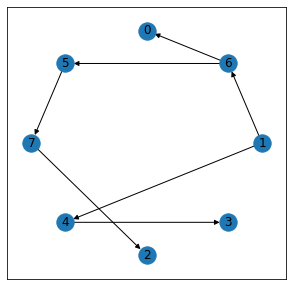

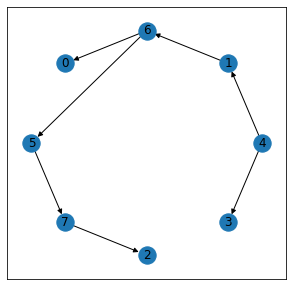

In [0]:
stan0 = STAN(starting_node = 0)
stan0.fit(X,y,M)
stan0.plot_tree_structure()

stan1 = STAN(starting_node = 1)
stan1.fit(X,y,M)
stan1.plot_tree_structure()


stan4 = STAN(starting_node = 4)
stan4.fit(X,y,M)
stan4.plot_tree_structure()

# Model selection, hyperparameter tuning

**Why TAN has worse performance than NB, stratified 10 folds, check this**

In [0]:
X = X.astype(int)
y = y.astype(int)

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import pandas as pd

## NB

In [0]:
nb = NB()
parameters = {'alpha':[1,2,3]}
"""scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)#,
    #'Conditional log likelihood': make_scorer(nb.Conditional_log_likelihood_general,C)
}"""
clf = GridSearchCV(nb, parameters,cv = 10)#,scoring = scorers,refit="accuracy_score")

In [0]:
clf.fit(X2, y2) #### why '1' cause so many problems??? shap and CV    X.astype(int) solve all those 
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007342,0.002411,0.001907,0.000244,1,{'alpha': 1},0.803571,0.821429,0.836364,0.8,0.818182,0.836364,0.890909,0.836364,0.836364,0.836364,0.831591,0.023872,1
1,0.005688,0.000398,0.001646,0.000172,2,{'alpha': 2},0.803571,0.821429,0.836364,0.8,0.818182,0.818182,0.854545,0.836364,0.836364,0.836364,0.826136,0.016020,2
2,0.005467,0.000202,0.001635,0.000196,3,{'alpha': 3},0.803571,0.821429,0.836364,0.8,0.818182,0.818182,0.854545,0.818182,0.836364,0.818182,0.822500,0.015335,3


## TAN

In [0]:
tan = TAN()
tan.get_params()
parameters = {'alpha':[1,2,3]}#,'starting_node':[0,1,2,3,4]}
"""scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)#,
    #'Conditional log likelihood': make_scorer(nb.Conditional_log_likelihood_general,C)
}"""
clf = GridSearchCV(tan, parameters,cv =10)#,scoring = scorers,refit="accuracy_score")

In [0]:
clf.fit(X2, y2) #### why '1' cause so many problems??? shap and CV    X.astype(int) solve all those 
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.355519,0.016399,0.002475,0.000199,1,{'alpha': 1},0.857143,0.928571,0.909091,0.836364,0.909091,0.872727,0.909091,0.909091,0.836364,0.927273,0.889481,0.033858,1
1,0.352741,0.007626,0.002467,0.000156,2,{'alpha': 2},0.857143,0.928571,0.909091,0.836364,0.890909,0.872727,0.909091,0.927273,0.818182,0.945455,0.889481,0.040115,1
2,0.336438,0.007771,0.002374,0.000112,3,{'alpha': 3},0.857143,0.928571,0.909091,0.836364,0.890909,0.854545,0.890909,0.927273,0.800000,0.945455,0.884026,0.043903,3


## STAN

In [0]:
stan = STAN()
stan.get_params()
parameters = {'alpha':[1,2,3]}#,'starting_node':[0,1,2]}
"""scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)#,
    #'Conditional log likelihood': make_scorer(nb.Conditional_log_likelihood_general,C)
}"""
clf = GridSearchCV(stan, parameters,cv =10)#,scoring = scorers,refit="accuracy_score")

In [0]:
clf.fit(X2,y2,M = M) 
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017534,0.001705,0.002509,0.000162,1,{'alpha': 1},0.857143,0.839286,0.854545,0.836364,0.854545,0.836364,0.872727,0.854545,0.818182,0.8,0.842370,0.020116,1
1,0.016700,0.000441,0.002602,0.000178,2,{'alpha': 2},0.839286,0.839286,0.854545,0.854545,0.854545,0.818182,0.872727,0.854545,0.818182,0.8,0.840584,0.021135,2
2,0.016735,0.000226,0.002579,0.000187,3,{'alpha': 3},0.839286,0.839286,0.854545,0.836364,0.854545,0.800000,0.872727,0.836364,0.800000,0.8,0.833312,0.024237,3


## Ensemble TAN

In [0]:
stan_tan_bag = STAN_TAN_bagging()
stan_tan_bag.get_params()

parameters = {'alpha':[1,2,3]}
#scorers = {
#    'precision_score': make_scorer(precision_score),
#    'recall_score': make_scorer(recall_score),
#    'accuracy_score': make_scorer(accuracy_score)#,
    #'Conditional log likelihood': make_scorer(nb.Conditional_log_likelihood_general,C)
#}
clf = GridSearchCV(stan_tan_bag, parameters,cv =10)#,scoring = scorers,refit="accuracy_score")

In [0]:
clf.fit(X2,y2,M = M2) 
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,2.820495,0.100825,0.017792,0.000738,1,{'alpha': 1},0.875000,0.910714,0.909091,0.854545,0.909091,0.854545,0.909091,0.927273,0.854545,0.945455,0.894935,0.031208,1
1,2.749486,0.061019,0.018019,0.002269,2,{'alpha': 2},0.857143,0.928571,0.909091,0.836364,0.872727,0.854545,0.909091,0.945455,0.836364,0.945455,0.889481,0.040931,2
2,2.738946,0.057944,0.017454,0.000555,3,{'alpha': 3},0.857143,0.928571,0.909091,0.836364,0.854545,0.854545,0.890909,0.945455,0.836364,0.945455,0.885844,0.041446,3
